<a href="https://colab.research.google.com/github/selenayyalcin/GlobalAIHubML/blob/main/GlobalAIHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global AI Hub - ML Projesi
Bu proje, makine öğrenmesi kavramı üzerine odaklanmaktadır. Makine öğrenmesi,

*   Supervised (Denetimli)
*   Unsupervised (Denetimsiz)

olmak üzere iki ana kategoriye ayrılır. Bu projede, supervised learning (denetimli öğrenme) kavramıyla ilgilenilmektedir.

Supervised learning, input verilerinin yanında hedef output etiketlerinin de bulunduğu bir öğrenme türüdür. Bu projede, sınıflandırma mantığı kullanılarak verilen bir veri kümesindeki özelliklerin, belirli bir output sınıfına ait olup olmadığını tahmin etmek için makine öğrenmesi algoritmaları kullanılacaktır. Sınıflandırma, veri setinin öğelerini önceden tanımlanmış sınıflara atayan bir süreçtir.

Projede, öncelikle üç farklı sınıflandırma algoritması denendi:


*   Random Forests
*   Support Vector Machines (SVM)
*   K-Nearest Neighbors (KNN)

Bu algoritmaların her biri, veri kümesini eğitmek için kullanıldı ve çapraz doğrulama (cross validation) kullanılarak performansları değerlendirildi. Elde edilen sonuçlara göre, KNN algoritması en iyi çapraz doğrulama sonucunu verdiği için, projede model olarak KNN algoritması seçildi. Bu algoritma, veri setindeki şarapların kalitesini tahmin etmek için kullanılacaktır.

Öncelikle, veri seti olarak 'Wine Quality' seçildi:
https://archive.ics.uci.edu/dataset/186/wine+quality


Bu veri seti, Portekiz "Vinho Verde" şarabının kırmızı ve beyaz çeşitleriyle ilgilidir. Gizlilik ve lojistik sorunlar nedeniyle, sadece fizikokimyasal (girişler) ve duyumsal (çıktı) değişkenler mevcuttur (örneğin, üzüm türleri, şarap markası, şarap satış fiyatı vb. hakkında veri bulunmamaktadır).

İlgili kütüphaneler eklendikten sonra, daha ayrıntılı olarak bu veri setinin özelliklerine ve değişkenlerine bakılabilir.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine-quality.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Bu metotlar, DataFrame hakkında genel bilgileri ve veri setinin temel istatistik özetini sağlar.
Bu çıktılarda görülen bazı özellikler:


*   Toplamda 6497 giriş (satır) ve 13 özellik
(sütun) bulunmaktadır.
*   11 özellik ondalık sayı türünde (float64), 1 özellik tam sayı türünde (int64), 1 özellik ise obje türündedir (object).
*   Bazı özelliklerde eksik değerler bulunmaktadır. Eksik değerler, eksik örneklerin sayısını göstermektedir.
*   Her özellik için ortalama değerler verilmiştir.
*   Özelliklerin standart sapmaları, veri dağılımının ne kadar yayıldığını göstermektedir.
*   En düşük ve en yüksek değerler, veri aralığını göstermektedir.

Örnek olarak veri setinin ilk satırlarındaki verilere de bakılabilir:





In [6]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Daha görsel bir analiz için ise matplotlib kütüphanesinin yardımıyla bir tablo oluşturulabilir:

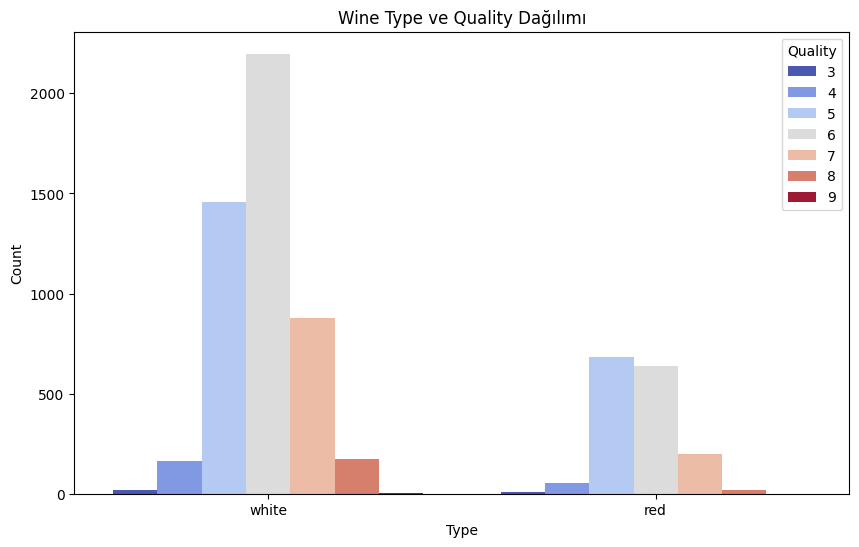

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='quality', data=df, palette='coolwarm')
plt.title('Wine Type ve Quality Dağılımı')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Quality')
plt.show()


Tablodaki kod, matplotlib ve seaborn kütüphanelerini kullanarak bir grafik ortaya çıkarır, seaborn kütüphanesinde bulunan countplot fonksiyonunu kullanarak bir sütun grafiği oluşturur.

*   X parametresi, grafikte x eksenindegörüntülenecek olan veri setindeki bir özelliği belirtir.
*   Hue parametresi, veri setindeki başka bir özelliğe göre renk kodlaması yapar. Bu durumda, quality özelliği kullanılarak renk kodlaması yapılır.
*   Data parametresi, kullanılacak veri setini belirtir.
*   Palette parametresi, kullanılacak renk paletini belirtir.





Artık veri setinin analizi yapıldığına ve hakkında bilgi sahibi olunduğuna göre, model belirlenip eğitilebilir.

Daha önce de bahsedildiği gibi, bu veri seti için 3 farklı model denendi ve cross validation skorlarına bakıldı. Sırasıyla bu modellere kısaca bir göz atılırsa:



 İlk denenen model, **Support Vector Machines (SVM)**. Bu algoritma, iki sınıf
arasındaki en iyi ayıran düzlemi bulmaya çalışır.
Hiper-düzlem, sınıflar arasındaki en büyük mesafeyi maksimize edecek şekilde seçilir.


```
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

df = pd.read_csv('wine-quality.csv')

impute = SimpleImputer(strategy='mean')
x = df.drop(['quality', 'type'], axis=1)
x_imputed = impute.fit_transform(x)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)

y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_model.fit(x_train, y_train)

cv_scores = cross_val_score(svm_model, x_scaled, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation Score:", np.mean(cv_scores))

accuracy = svm_model.score(x_test, y_test)
print("SVM Accuracy:", accuracy)
```

Cross Validation Scores: [0.50846154 0.54769231 0.52886836 0.57736721 0.36720554]

Average Cross Validation Score: 0.5059189909397761

SVM Accuracy: 0.5838461538461538



Sonraki denenen model, **Random Forest**. Bu algoritma karar ağaçlarından oluşan bir öğrenme algoritmasıdır.
Her bir ağaç, veri setinin rastgele örneklemlerini kullanarak ve rastgele özelliklerini seçerek eğitilir. Sonuç olarak, birden çok ağacın tahminlerinin ortalaması veya modu alınarak final tahmin yapılır.


```
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('wine-quality.csv')

impute = SimpleImputer(strategy='most_frequent')
x = df.drop(['quality', 'type'], axis=1)
x_imputed = impute.fit_transform(x)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)

y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

cv_scores = cross_val_score(rf_model, x_scaled, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Average Cross Validation Score:", np.mean(cv_scores))
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy", accuracy)


```
Cross Validation Scores: [0.50461538 0.54153846 0.5334873  0.54888376 0.40877598]

Average Cross Validation Score: 0.5074601764671048

Random Forest Accuracy 0.7


En son denenen model ise, **K-nearest Neighbors** Algoritması. Bu model, bir örneği sınıflandırmak için en yakın k komşularının etiketlerini kullanır ve en sık kullanılan etiketi tahmin eder.

Projeye bu algoritmanın entegre edilmesi için, ilk olarak bir Pipeline oluşturuldu ve bu pipeline üzerinden veri işleme adımları ve sınıflandırma modeli bir araya getirildi.

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
]

pipeline = Pipeline(steps)

Daha sonra, bağımlı ve bağımsız değişkenler x ve y değişkenlerine atandı.

Böylece train_test_split() fonksiyonu kullanılarak veri seti, belirli bir oranda (burada %20) test kümesi ve geri kalanı eğitim kümesi olacak şekilde rastgele ikiye ayrılmdı. Bu ayrım işlemi, eğitimde kullanılan verinin modelin performansını doğrulamak için ayrılmasını sağlar.

Sonrasında ise önceden tanımlanmış bir pipeline nesnesi olan pipeline, eğitim verisi (x_train ve y_train) üzerinde fit() metoduyla eğitildi.

In [9]:
x = df.drop(['quality', 'type'], axis=1)
y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline.fit(x_train, y_train)

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [10]:
cv_score = cross_val_score(pipeline, x_train, y_train, cv=5)
print("Cross Validation Score ", cv_score)
print("Average Cross Validation Score: ", np.mean(cv_score))

Cross Validation Score  [0.50961538 0.53653846 0.56111646 0.53128008 0.55630414]
Average Cross Validation Score:  0.5389709039757162


Görüldüğü üzere önceden denenilen algoritmalardan daha iyi bir Cross Validation Skoru elde edildi.

Modelin Confusion Matrix'i, Classification Report'u ve Accuracy değeri ise bu şekildedir:

In [12]:
y_pred = pipeline.predict(x_test)

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

print("Classification Report: ")
print(classification_report(y_test, y_pred, zero_division='warn'))

accuracy = accuracy_score(y_test, y_pred)
print("K-nn Accuracy:", accuracy)

Confusion Matrix: 
[[  0   0   2   0   0   0]
 [  0  13  22  10   1   0]
 [  3  17 268 121  10   1]
 [  3  20 138 350  62   6]
 [  0   3  28  81  98  11]
 [  0   0   1  16   8   7]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.28      0.26        46
           5       0.58      0.64      0.61       420
           6       0.61      0.60      0.61       579
           7       0.55      0.44      0.49       221
           8       0.28      0.22      0.25        32

    accuracy                           0.57      1300
   macro avg       0.38      0.36      0.37      1300
weighted avg       0.57      0.57      0.57      1300

K-nn Accuracy: 0.5661538461538461


Başarı oranının yaklaşık olarak %56 olduğu görülüyor. Bu oranı arttırmak için yapılabilecek yöntemler arasında hiperparametre optimizasyonu yapmak için kullanılan Grid Search yöntemini yer alır. Grid Search, belirli bir hiperparametre kümesi üzerinde ağır bir arama yaparak, en iyi hiperparametre kombinasyonunu bulmayı amaçlar.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('impute',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                         'classifier__n_neighbors': [3, 5, 7, 9, 11],
                         'classifier__weights': ['uniform', 'distance']})

Grid Search yönteminin gerçekleşmesi için şu adımlar takip edilir:



*   param_grid adlı bir sözlük kullanılarak, KNN modelinin farklı hiperparametre kombinasyonları tanımlanır. Bu kombinasyonlar, KNN modelinin komşu sayısı (n_neighbors), ağırlıklandırma yöntemi (weights) ve algoritma (algorithm) gibi parametrelerini içerir.
*   GridSearchCV sınıfı kullanılarak, önceden belirlenen parametre grid'i ve çapraz doğrulama (cross-validation) sayısı (cv) ile bir Grid Search nesnesi (grid_search) oluşturulur. Bu nesne, belirtilen parametre kombinasyonlarını ve çapraz doğrulama ile her birini değerlendirir ve en iyi performansı sağlayan parametreleri bulur.
*   grid_search.best_params_ ve grid_search.best_score_ özellikleri kullanılarak, en iyi parametre kombinasyonu ve bu kombinasyona karşılık gelen en iyi çapraz doğrulama skoru yazdırılır.





In [14]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}
En iyi skor: 0.6409504331087584


Son olarak ise, grid_search.best_estimator_ özelliği kullanılarak en iyi model seçilir. Bu model daha sonra test verisi üzerinde predict() metodu ile tahminler yapar. Elde edilen tahminlerle, confusion matrix, sınıflandırma raporu (classification report) ve doğruluk (accuracy) gibi modelin performansını değerlendiren metrikler hesaplanır ve yazdırılır.

In [16]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division='warn'))

accuracy = accuracy_score(y_test, y_pred)
print("K-nn Accuracy:", accuracy)

Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   6  18  20   2   0]
 [  1   0 307 104   8   0]
 [  0   1  89 431  55   3]
 [  0   1   9  82 128   1]
 [  0   0   0  12  13   7]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.75      0.13      0.22        46
           5       0.72      0.73      0.73       420
           6       0.66      0.74      0.70       579
           7       0.62      0.58      0.60       221
           8       0.64      0.22      0.33        32

    accuracy                           0.68      1300
   macro avg       0.57      0.40      0.43      1300
weighted avg       0.68      0.68      0.67      1300

K-nn Accuracy: 0.6761538461538461


In [17]:
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6769887362151443
Recall: 0.6761538461538461
F1 Score: 0.665194109258993



Bu projede, ilk olarak veri seti seçildikten sonra okunup incelendi, sonrasında eksik veriler en sık kullanılan değerlerle doldurulup ölçeklendirildi. Veri seti üzerinde denenen modeller arasından KNN, cross validation değeri en yüksek algoritma olması sebebiyle seçildi ve veri seti eğitim ve test alt kümelerine ayrılarak eğitildi.

Daha sonra Grid Search yöntemi kullanılarak KNN modelinin hiperparametreleri optimize edildi. Bu, farklı hiperparametre kombinasyonlarını deneyerek en iyi modeli bulmayı amaçladı ve sonuçlar en iyi modelin performansı üzerinde değerlendirilerek raporlandı.

Grid Search sonrası elde edilen modelin performansında belirgin bir iyileşme görüldü, bu modelin daha iyi hiperparametrelerle eğitilerek daha iyi tahminler yapabileceği anlamına gelir.

Sonuç olarak, Grid Search'in modelin performansını artırdığı ve bu şekilde daha güvenilir tahminler elde edilebileceği sonucuna varılabilir.

# Kaynaklar

*   https://archive.ics.uci.edu/dataset/186/wine+quality
*   https://seaborn.pydata.org/generated/seaborn.countplot.html
*   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
*   https://www.geeksforgeeks.org/k-nearest-neighbours/
*   https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/
*   https://www.geeksforgeeks.org/support-vector-machine-algorithm/
*   https://en.wikipedia.org/wiki/Hyperparameter_optimization



